This notebook sets up the mapping of the 20" PMTs to CNN image pixel locations, for the HK geometry where both 20" and mPMTs are simulated but only the 20" PMTs used for the CNN.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Open geometry file

In [2]:
geofile = np.load("/fast_scratch/WatChMaL/data/HKHybrid/HKHybrid_wo_mpmts.geo.npz")

In [3]:
pmt_id = geofile['tube_no']
pmt_pos = geofile['position']
pmt_dir = geofile['orientation']

## Get each wall's PMTs
 
* Top endcap has PMT z direction downwards (-1)
* Bottom endcap has PMT z direction upwards (1)
* Barrel has PMT z direction horizontal (0)

In [4]:
top_endcap = np.where(pmt_dir[:,2]==-1)[0]
bottom_endcap = np.where(pmt_dir[:,2]==1)[0]
barrel = np.where(np.abs(pmt_dir[:,2])<1e-8)[0]

## Plot the geometry of each wall

Plot top endcap PMT positions on x-y plane

Text(0, 0.5, 'PMT y [cm]')

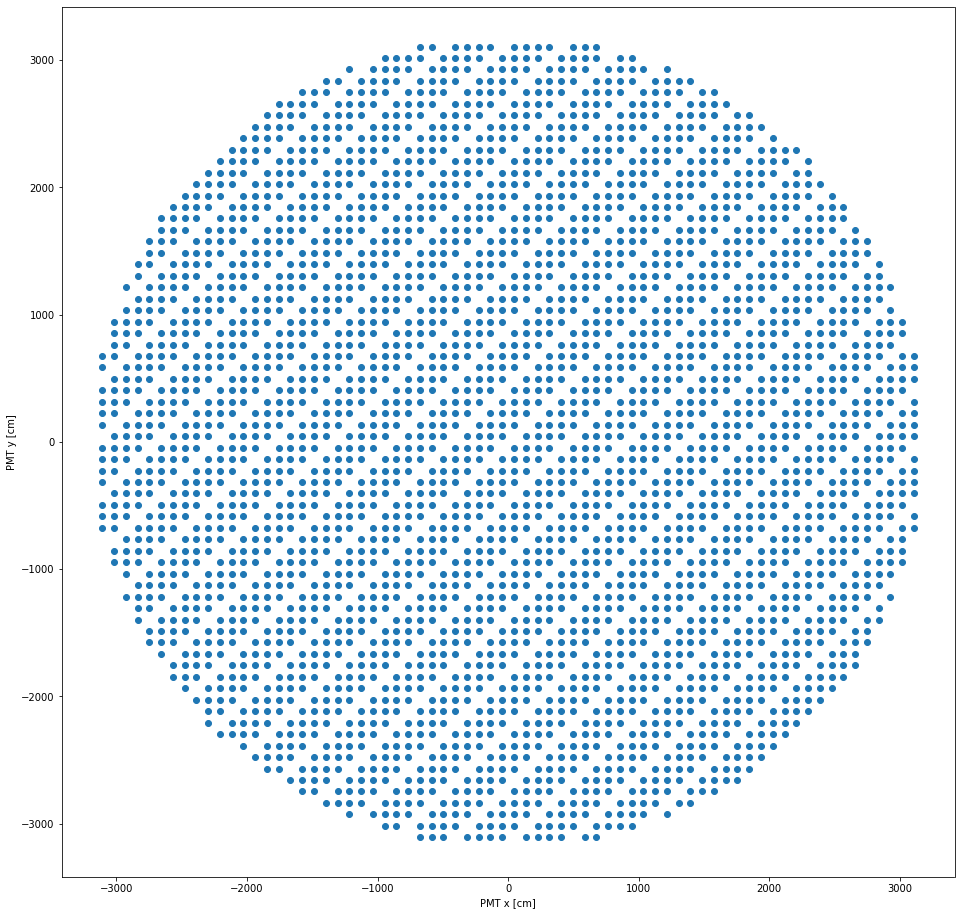

In [5]:
fig, ax = plt.subplots(figsize=(16,16))
ax.scatter(x=pmt_pos[top_endcap,0], y=pmt_pos[top_endcap,1])
ax.set_xlabel("PMT x [cm]")
ax.set_ylabel("PMT y [cm]")

Plot bottom endcap PMT positions on x-y plane

Text(0, 0.5, 'PMT y [cm]')

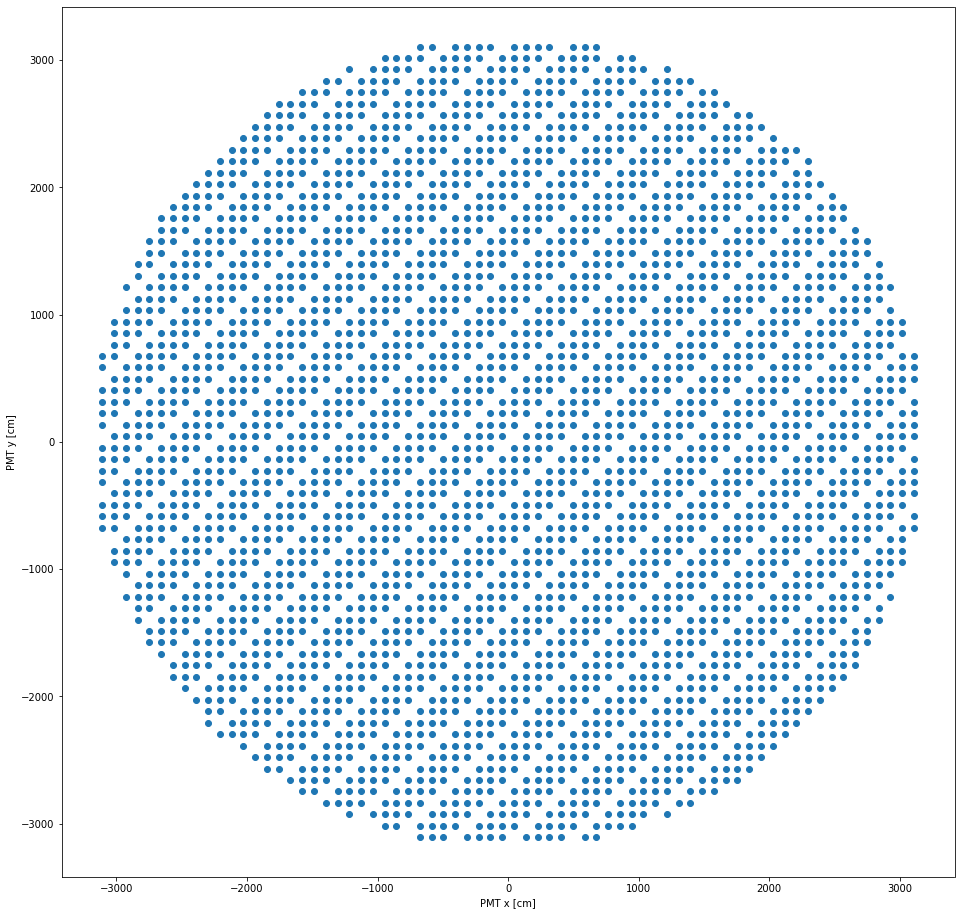

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
ax.scatter(x=pmt_pos[bottom_endcap,0], y=pmt_pos[bottom_endcap,1])
ax.set_xlabel("PMT x [cm]")
ax.set_ylabel("PMT y [cm]")

Plot top barrel PMT positions on phi-z plane, colour by x position and y position

In [7]:
barrel_phi = np.arctan2(pmt_pos[barrel,1], pmt_pos[barrel,0])

Text(0, 0.5, 'PMT z [cm]')

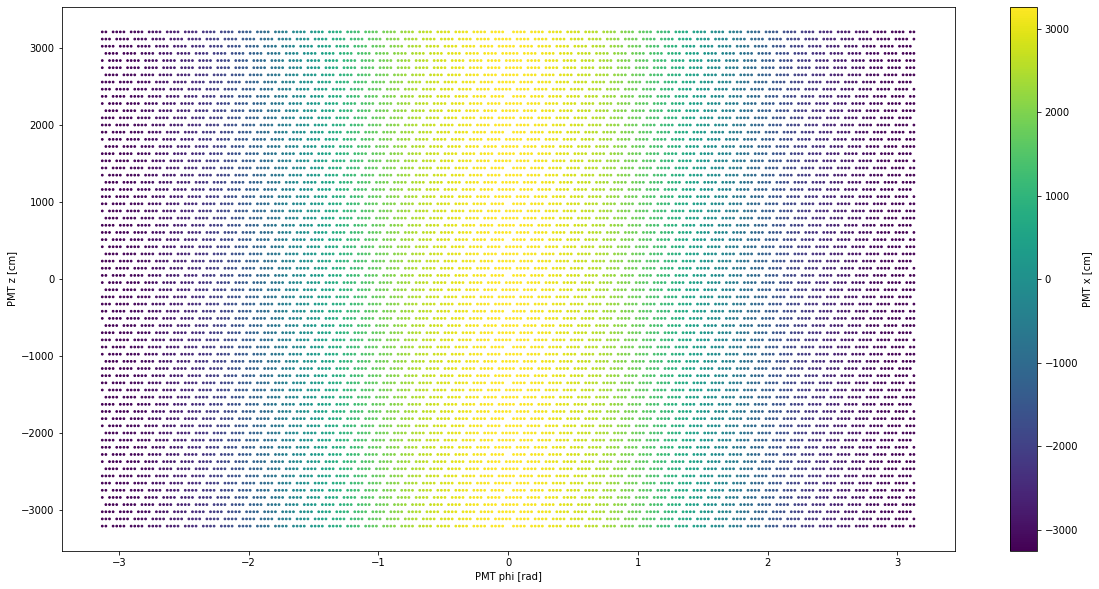

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x=barrel_phi, y=pmt_pos[barrel,2], c=pmt_pos[barrel,0], s=3)
plt.colorbar(sc, label="PMT x [cm]")
ax.set_xlabel("PMT phi [rad]")
ax.set_ylabel("PMT z [cm]")

Text(0, 0.5, 'PMT z [cm]')

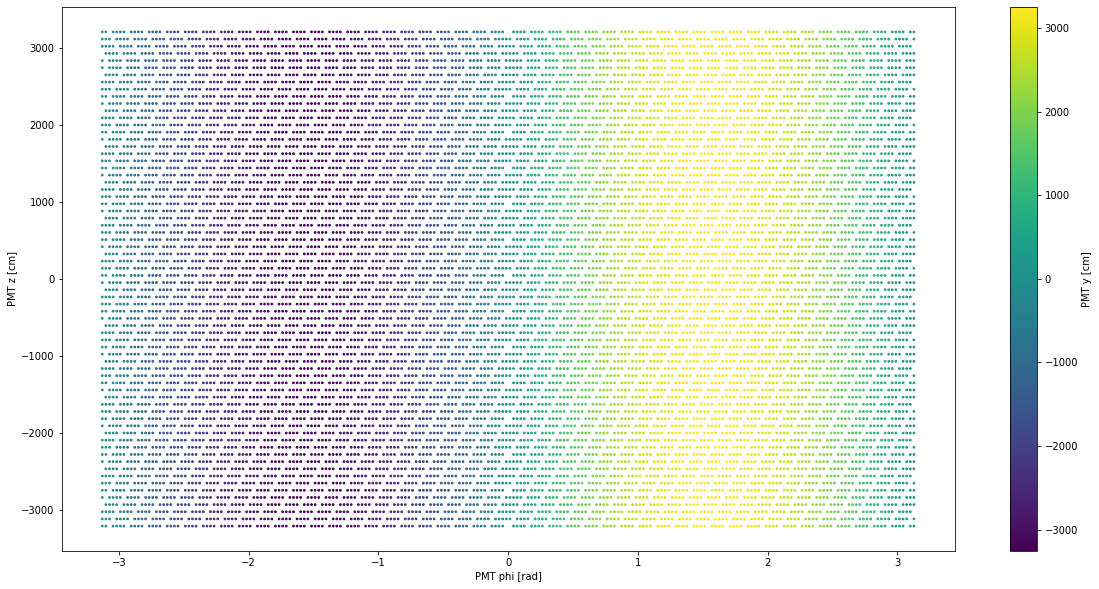

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x=barrel_phi, y=pmt_pos[barrel,2], c=pmt_pos[barrel,1], s=3)
plt.colorbar(sc, label="PMT y [cm]")
ax.set_xlabel("PMT phi [rad]")
ax.set_ylabel("PMT z [cm]")

The positive x values are in the middle of the barrel, and the negative x values are at the outside.

The positive y values are to the right of centre and the negative y values are to the left of centre.

So to line up the end-caps on the image above and below the barrel:

* The top endcap should have the positive x PMTs at the bottom, just above the middle of the barrel and negative x PMTs at the top, with y values going from left to right.
* The bottom endcap should have the positive x PMTs at the top, just below the barrel, and the negative x PMTs at the bottom, with y values going from left to right.

## Get row and column indices of PMTs in each wall

### Barrel

For the barrel:

* Columns are phi running from negative to positive
* Rows are z position, running from negative to positive

In [10]:
# Find the sorted unique barrel row coordinates (z position of the PMTs)
barrel_row_positions = np.sort(np.unique(pmt_pos[barrel,2]))
# Find the row index of each PMT: the index of the PMT's z position in the set of sorted unique z positions.
barrel_row_indices = np.searchsorted(barrel_row_positions, pmt_pos[barrel,2])

In [11]:
# Find the sorted unique barrel column coordinates (azimuth (phi) position of the PMTs)
barrel_column_positions = np.sort(np.unique(barrel_phi))
# Find the column index of each PMT: the index of the PMT's phi position in the set of sorted unique phi positions.
barrel_column_indices = np.searchsorted(barrel_column_positions, barrel_phi)

Plot using columns and rows, coloured by x, y, z and phi position, to check it looks correct

Text(0, 0.5, 'Barrel row')

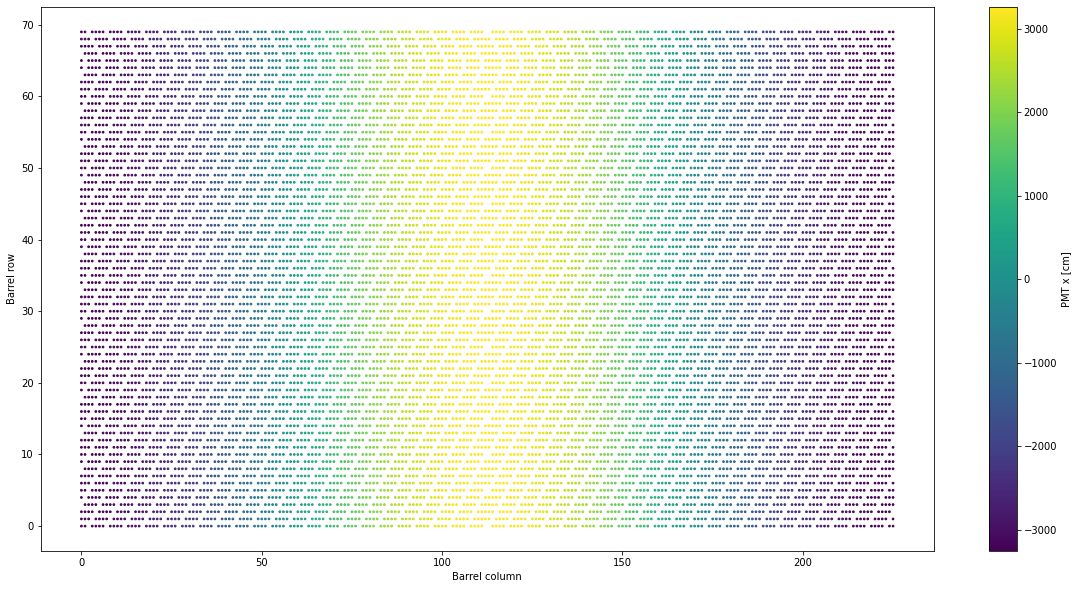

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x=barrel_column_indices, y=barrel_row_indices, c=pmt_pos[barrel, 0], s=3)
plt.colorbar(sc, label="PMT x [cm]")
ax.set_xlabel("Barrel column")
ax.set_ylabel("Barrel row")

Text(0, 0.5, 'Barrel row')

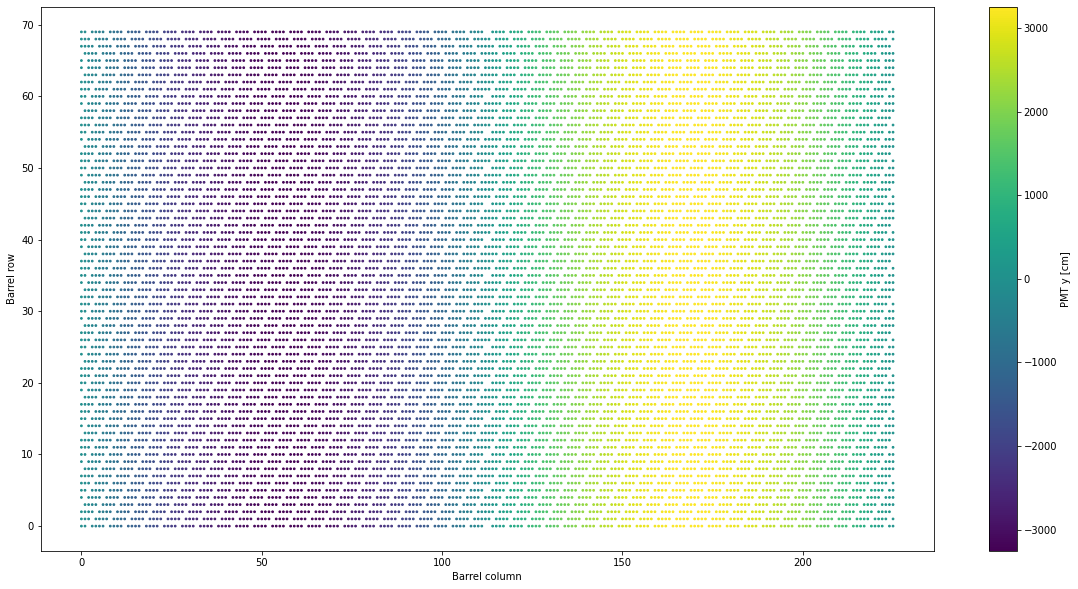

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x=barrel_column_indices, y=barrel_row_indices, c=pmt_pos[barrel,1], s=3)
plt.colorbar(sc, label="PMT y [cm]")
ax.set_xlabel("Barrel column")
ax.set_ylabel("Barrel row")

Text(0, 0.5, 'Barrel row')

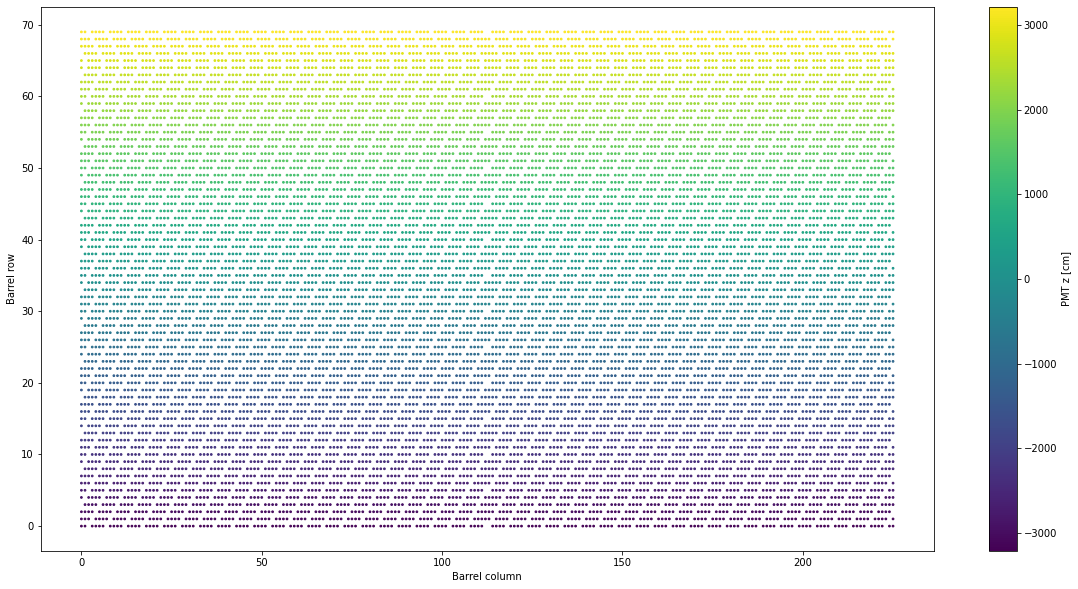

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x=barrel_column_indices, y=barrel_row_indices, c=pmt_pos[barrel,2], s=3)
plt.colorbar(sc, label="PMT z [cm]")
ax.set_xlabel("Barrel column")
ax.set_ylabel("Barrel row")

Text(0, 0.5, 'Barrel row')

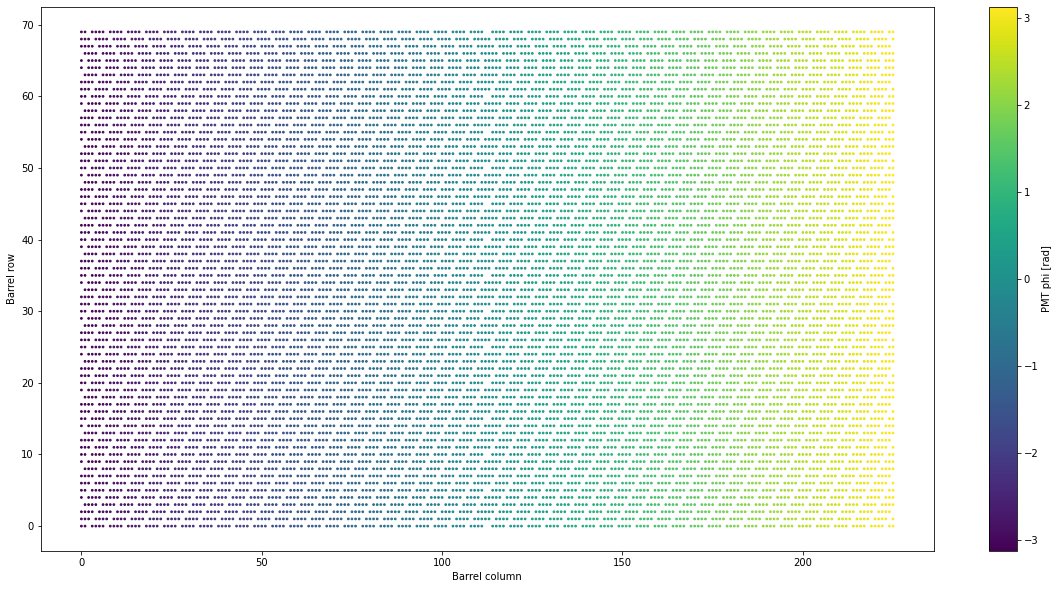

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x=barrel_column_indices, y=barrel_row_indices, c=barrel_phi, s=3)
plt.colorbar(sc, label="PMT phi [rad]")
ax.set_xlabel("Barrel column")
ax.set_ylabel("Barrel row")

### Endcaps

For the endcaps:

* Top endcap row should be from positive x to negative x
* Top endcap column should be from negative y to positive y
* Bottom endcap row should be from negative x to positive x (opposite of top endcap)
* Bottom endcap column should be from negative y to positive y (same as top endcap)

### Top endcap rows and columns

In [16]:
# use negative x values so rows in top endcap go from positive to negative
top_row_positions = np.sort(np.unique(-pmt_pos[top_endcap,0]))
top_row_indices = np.searchsorted(top_row_positions, -pmt_pos[top_endcap,0])

In [17]:
top_column_positions = np.sort(np.unique(pmt_pos[top_endcap,1]))
top_column_indices = np.searchsorted(top_column_positions, pmt_pos[top_endcap,1])

Plot using columns and rows, coloured by x position and y position, to check it looks correct

Text(0, 0.5, 'Top endcap row')

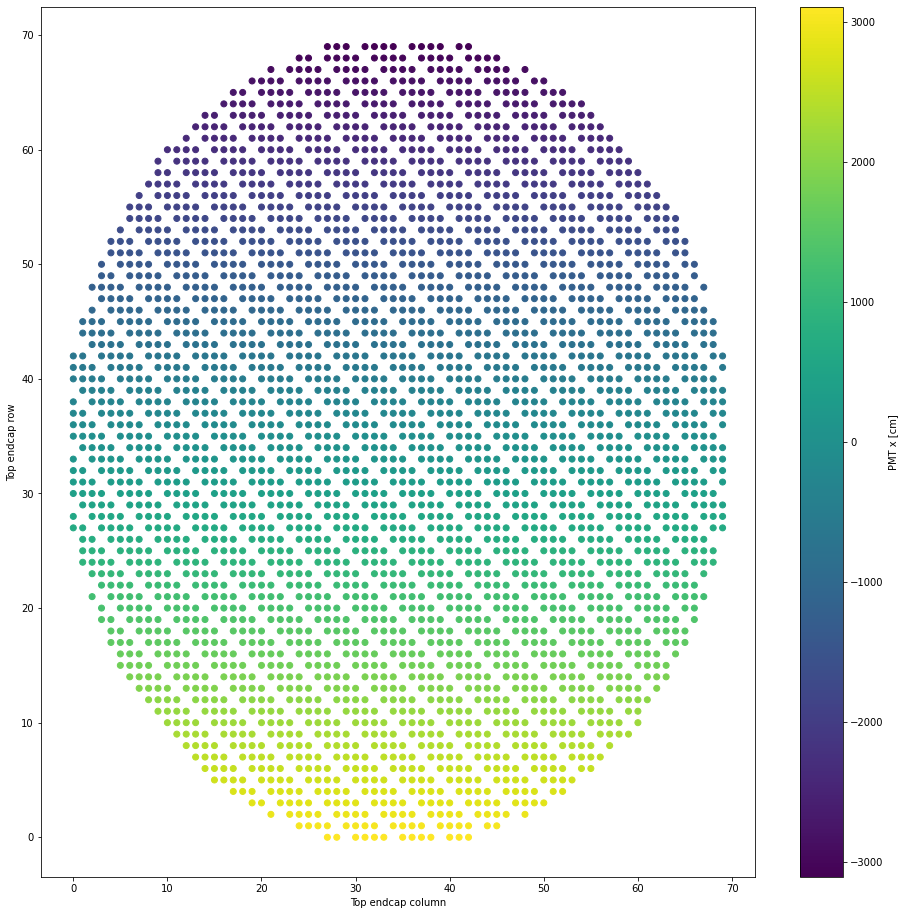

In [18]:
fig, ax = plt.subplots(figsize=(16,16))
sc = ax.scatter(x=top_column_indices, y=top_row_indices, c=pmt_pos[top_endcap,0])
plt.colorbar(sc, label="PMT x [cm]")
ax.set_xlabel("Top endcap column")
ax.set_ylabel("Top endcap row")

Text(0, 0.5, 'Top endcap row')

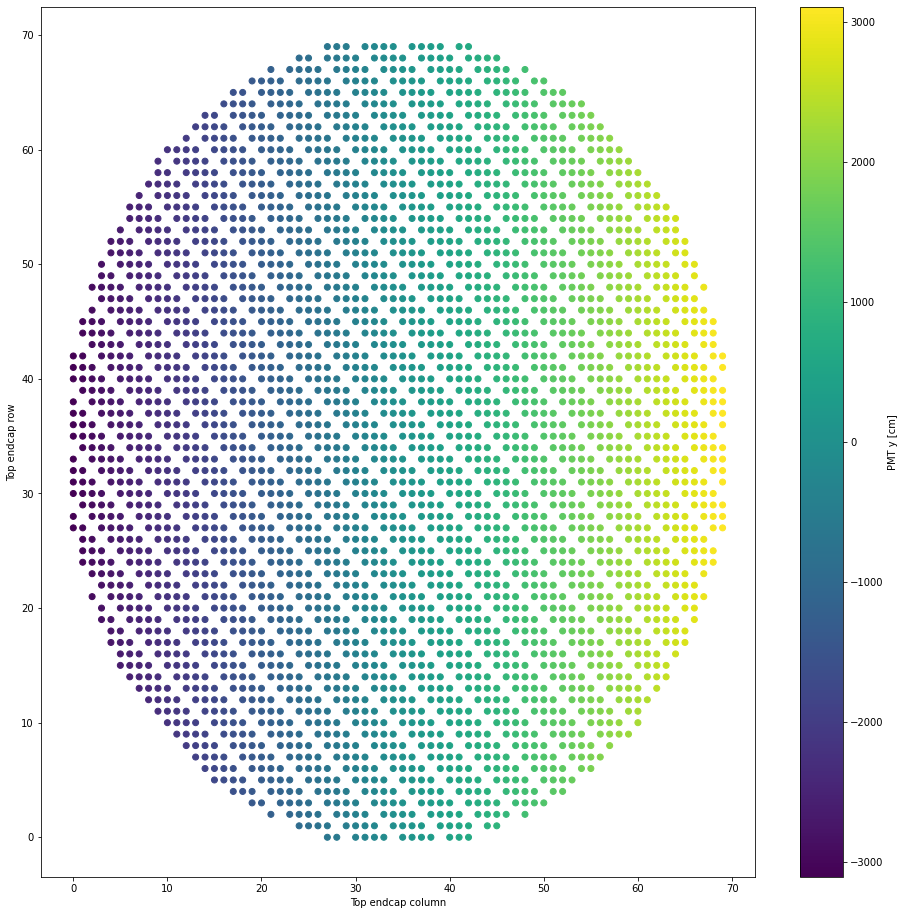

In [19]:
fig, ax = plt.subplots(figsize=(16,16))
sc = ax.scatter(x=top_column_indices, y=top_row_indices, c=pmt_pos[top_endcap,1])
plt.colorbar(sc, label="PMT y [cm]")
ax.set_xlabel("Top endcap column")
ax.set_ylabel("Top endcap row")

### Bottom endcap rows and columns

In [20]:
bottom_row_positions = np.sort(np.unique(pmt_pos[bottom_endcap,0]))
bottom_row_indices = np.searchsorted(bottom_row_positions, pmt_pos[bottom_endcap,0])

In [21]:
bottom_column_positions = np.sort(np.unique(pmt_pos[bottom_endcap,1]))
bottom_column_indices = np.searchsorted(bottom_column_positions, pmt_pos[bottom_endcap,1])

Plot using columns and rows, coloured by x position and y position, to check it looks correct

Text(0, 0.5, 'Bottom endcap row')

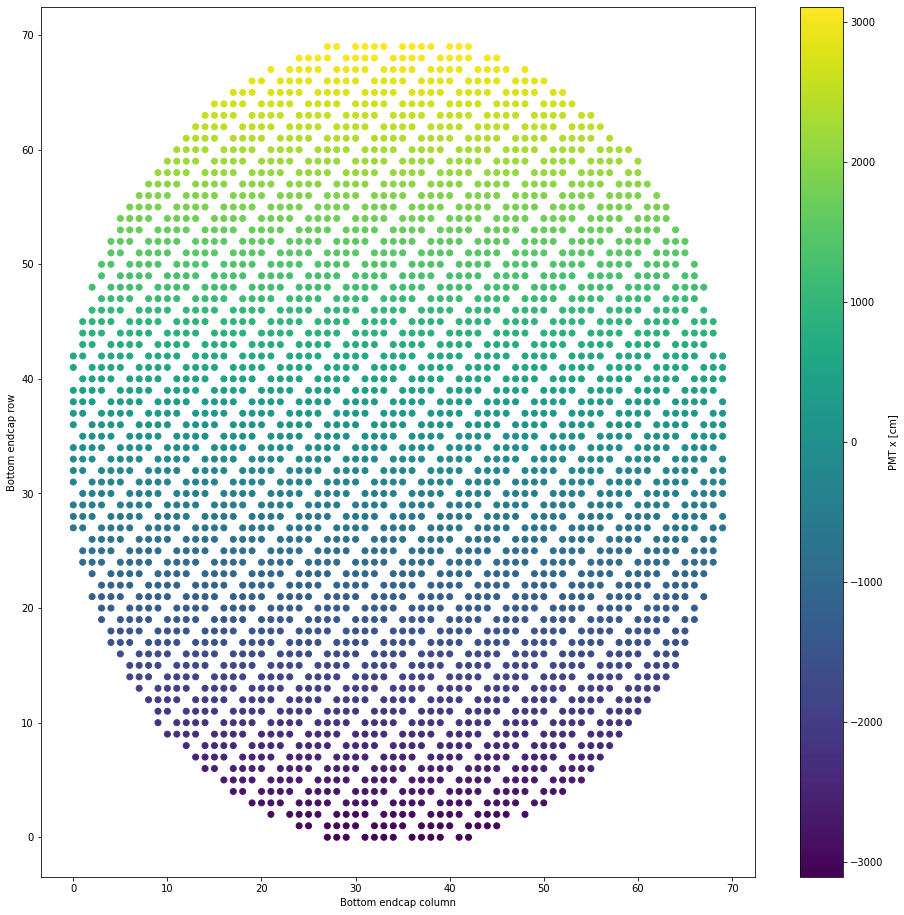

In [22]:
fig, ax = plt.subplots(figsize=(16,16))
sc = ax.scatter(x=bottom_column_indices, y=bottom_row_indices, c=pmt_pos[bottom_endcap,0])
plt.colorbar(sc, label="PMT x [cm]")
ax.set_xlabel("Bottom endcap column")
ax.set_ylabel("Bottom endcap row")

Text(0, 0.5, 'Bottom endcap row')

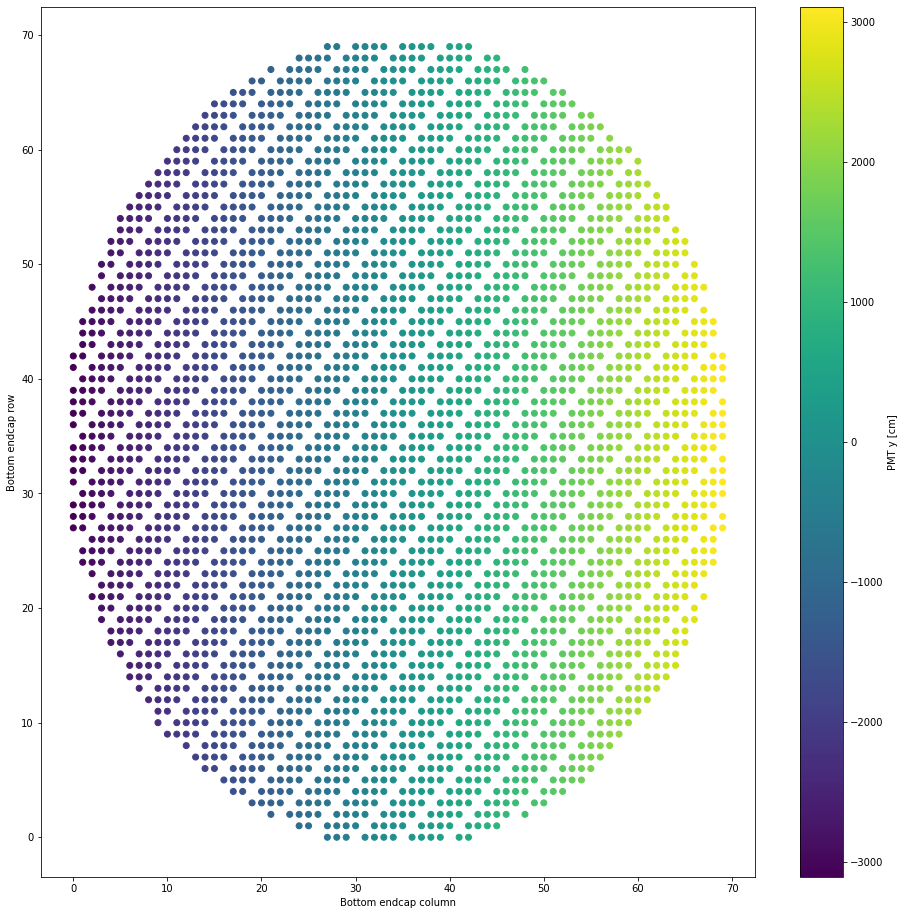

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
sc = ax.scatter(x=bottom_column_indices, y=bottom_row_indices, c=pmt_pos[bottom_endcap,1])
plt.colorbar(sc, label="PMT y [cm]")
ax.set_xlabel("Bottom endcap column")
ax.set_ylabel("Bottom endcap row")

## Put it all together

### Shift the rows and columns to place the three parts one above another

The bottom endcap goes at the bottom, the barrel goes above that, so shift its rows by the number of bottom endcap rows, and the top endcap goes above that, so shift its rows by the total number of rows in bottom endcap and barrel.

The two endcaps columns are shifted by half the number of barrel columns minus half the number of endcap columns, to align the middle of the endcaps with the middle of the barrel.

In [24]:
barrel_row_indices += len(bottom_row_positions)
top_row_indices += len(bottom_row_positions) + len(barrel_row_positions)

In [25]:
top_column_indices += (len(barrel_column_positions) - len(top_column_positions))//2
bottom_column_indices += (len(barrel_column_positions) - len(bottom_column_positions))//2

### Combine the separate walls

In [26]:
rows = np.zeros_like(pmt_id)
rows[barrel] = barrel_row_indices
rows[top_endcap] = top_row_indices
rows[bottom_endcap] = bottom_row_indices

In [27]:
columns = np.zeros_like(pmt_id)
columns[barrel] = barrel_column_indices
columns[top_endcap] = top_column_indices
columns[bottom_endcap] = bottom_column_indices

### Plot the final results

Plot using combined columns and rows, coloured by x, y and z PMT positions

Text(0, 0.5, 'CNN image row')

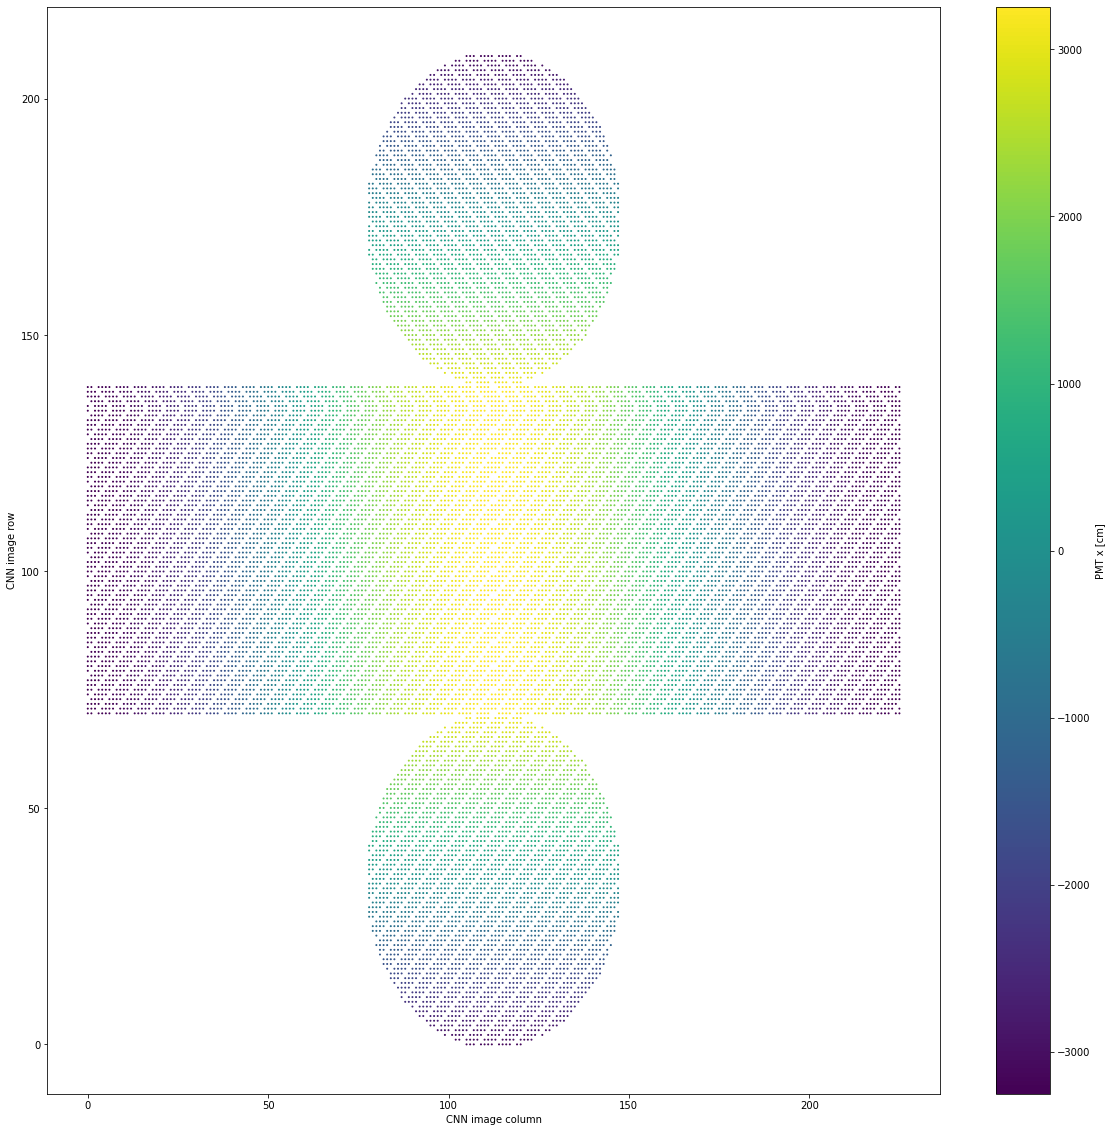

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
sc = ax.scatter(x=columns, y=rows, c=pmt_pos[:,0], s=1)
plt.colorbar(sc, label="PMT x [cm]")
ax.set_xlabel("CNN image column")
ax.set_ylabel("CNN image row")

Text(0, 0.5, 'CNN image row')

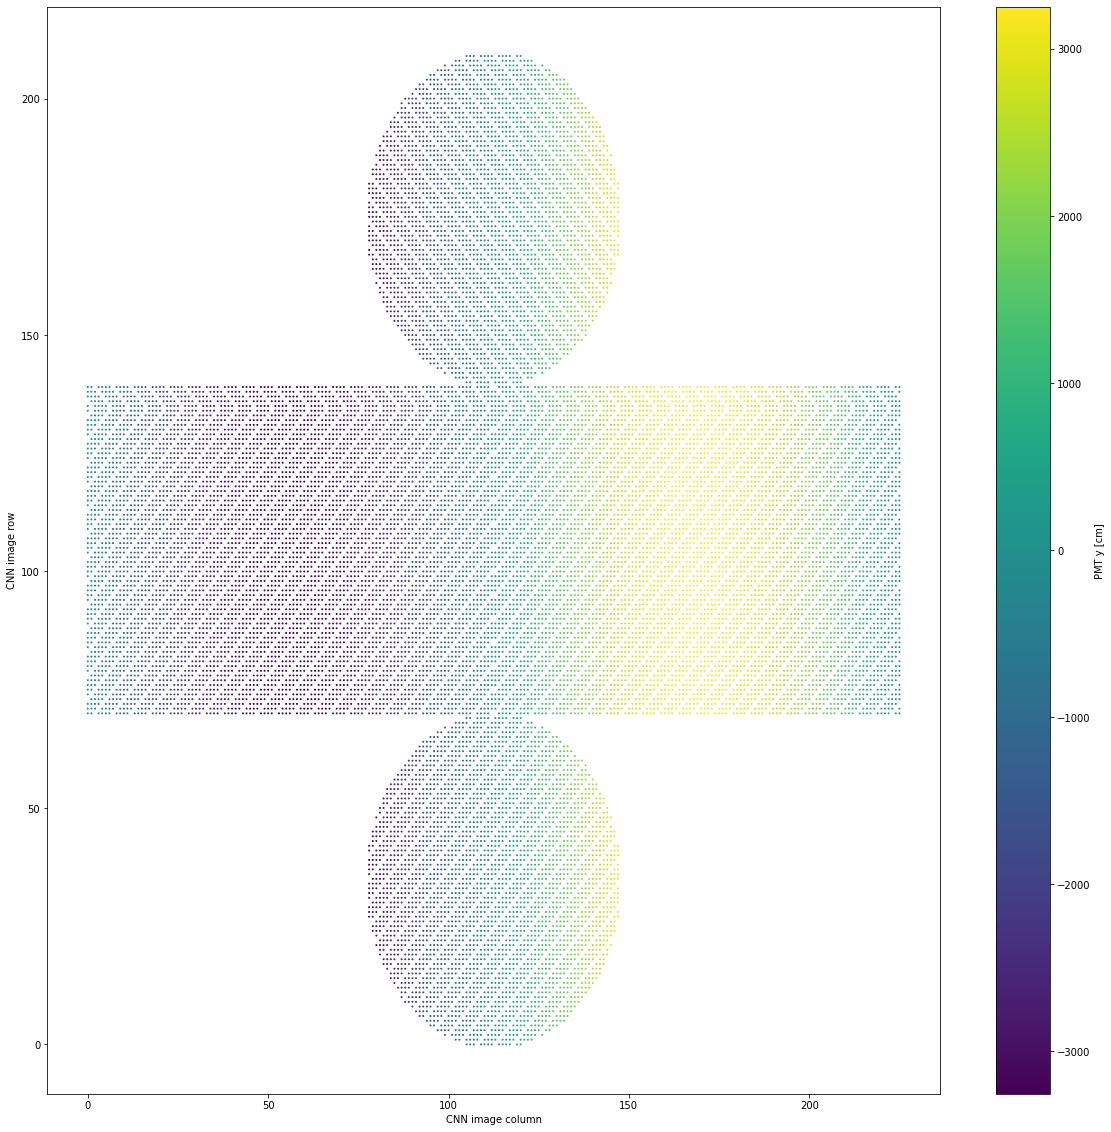

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
sc = ax.scatter(x=columns, y=rows, c=pmt_pos[:,1], s=1)
plt.colorbar(sc, label="PMT y [cm]")
ax.set_xlabel("CNN image column")
ax.set_ylabel("CNN image row")

Text(0, 0.5, 'CNN image row')

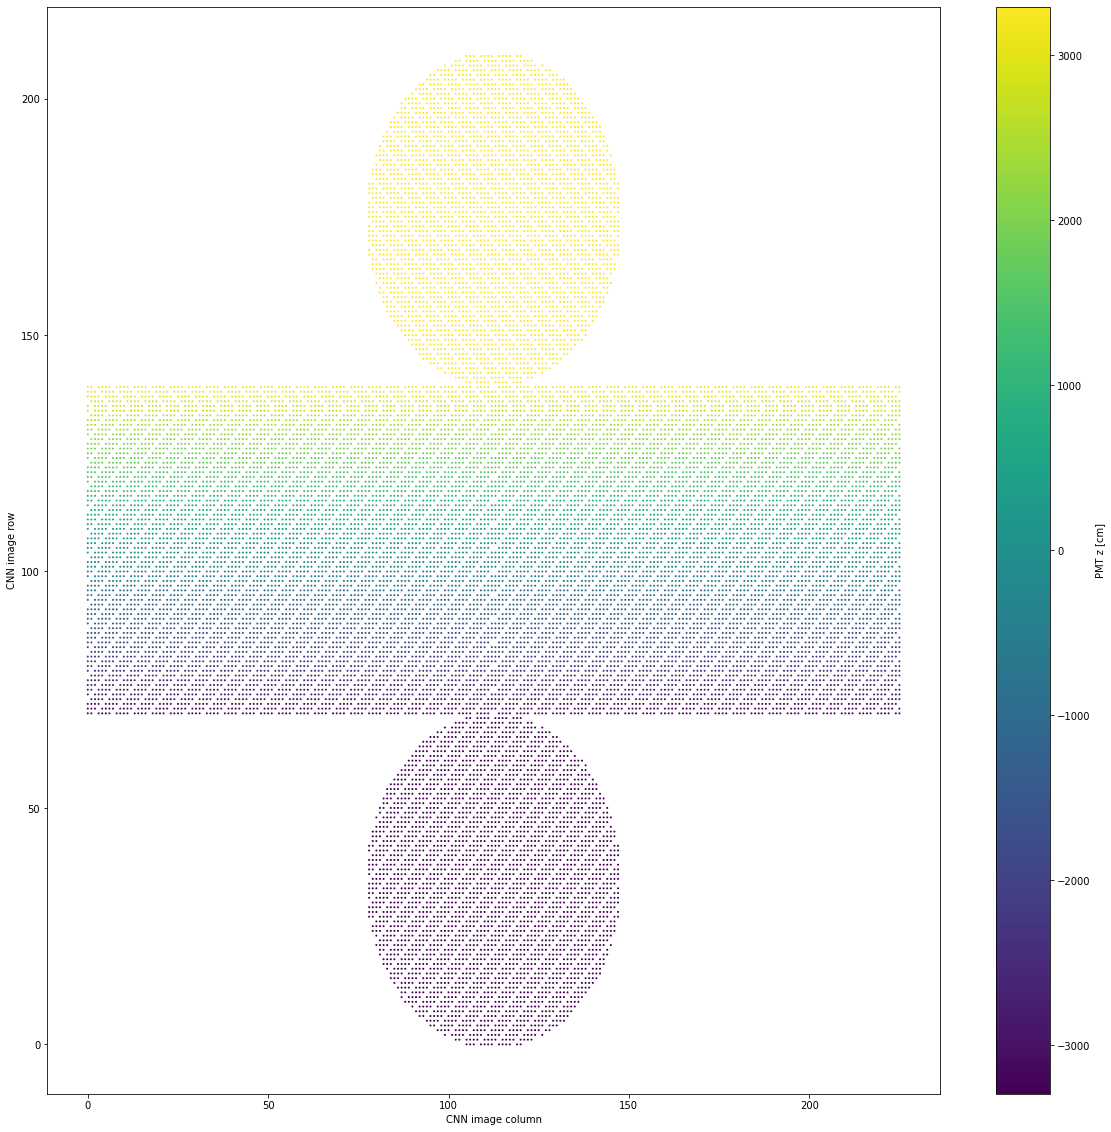

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
sc = ax.scatter(x=columns, y=rows, c=pmt_pos[:,2], s=1)
plt.colorbar(sc, label="PMT z [cm]")
ax.set_xlabel("CNN image column")
ax.set_ylabel("CNN image row")

### Save the row, column positions

In [31]:
pmt_image_positions = np.column_stack((rows, columns))

In [32]:
np.savez("/fast_scratch/WatChMaL/data/HKHybrid/HK_PMT_image_positions.npz", pmt_image_positions=pmt_image_positions)